In [2]:
from utility import *
from scipy.integrate import quad

In [ ]:
f = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-12/' + 'Bias-Spectroscopy' + '{}'.format(28).zfill(5) + '.dat')

In [ ]:
bias = f.data[:, 0]
I_fwd = f.data[:, 1]
I_bwd = f.data[:, 4]
fwd = f.data[:, 2]
bwd = f.data[:, 5]
# IV_fwd = I_fwd / bias
# IV_bwd = I_bwd / bias

# fwd_normalized = fwd / IV_fwd
# bwd_normalized = bwd / IV_bwd

In [ ]:
f.data.shape

In [ ]:
x = []
y_fwd = []
y_bwd = []

for i in range(len(bias)):
    if (bias[i] <= -20e-3) or (bias[i] >= 30e-3):
        x.append(bias[i])
        y_fwd.append(fwd[i])
        y_bwd.append(bwd[i])
    else:
        continue

x = np.append(x, x)
y = np.append(y_fwd, y_bwd)

In [ ]:
with open('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/test.txt', 'w') as f:
    for i in range(len(bias)):
        string = str(bias[i]) + '\t' + str(fwd[i]) + '\n'
        f.write(string)
    for j in range(len(bias)):
        string = str(bias[j]) + '\t' + str(bwd[j]) + '\n'
        f.write(string)


In [ ]:
def poly_back(bias, a, b, c):
    return a * bias ** 2 + b * bias ** 1 + c 

def dynes_func(bias, delta, Gamma):
    return np.real((np.abs(bias) - 1j * Gamma) / np.sqrt((bias - 1j * Gamma) ** 2 - delta ** 2))

def fermi_dirac(E, T = 5.1):
    k_B = 8.617333262145e-5
    return 1 / (np.exp(E / (k_B * T))+ 1)

# def D_fermi_dirac(E, T = 5.1):
#     k_B = 8.617333262145e-5
#     return 1 / (2 * k_B * T) / (1 + np.cosh(E / (k_B * T))) / (1 / (2 * k_B * T) / (1 + np.cosh(0)))

def D_fermi_dirac(E, bias = 0,T = 5.1):
    k_B = 8.617333262145e-5
    return 1 / ((k_B * T) * np.cosh((E - bias) / 2 / (k_B * T)) ** 2)

def intergrand(E, args):
    bias, delta, Gamma = args
    return dynes_func(E, delta, Gamma) * D_fermi_dirac(E, bias)


def func(x, ):

    return 

# def dIdV_curve(bias, delta, Gamma, A):
#     res = A * quad(intergrand, 0, np.inf, [bias, delta, Gamma])
#     return res

# v_curve = np.vectorize(dIdV_curve)
# def dIdV(bias, delta, Gamma, A):
#     return dIdV_curve(bias, delta, Gamma, A)

In [ ]:
popt, pcov = curve_fit(poly_back, x, y)

In [ ]:
fwd_bc = fwd / poly_back(bias, popt[0], popt[1], popt[2])
bwd_bc = bwd / poly_back(bias, popt[0], popt[1], popt[2])

In [ ]:
fig, axis = plt.subplots()

# axis.plot(bias - 7e-3, fwd_bc, '.', color = 'red') # forward
# axis.plot(bias - 7e-3, bwd_bc, '.', color = 'black') # backward
# axis.plot(bias - 7e-3, fermi_dirac(bias - 7e-3), '-', color = 'blue')
axis.plot(bias - 7e-3, D_fermi_dirac(bias - 7e-3), '-', color = 'orange')
# poly background
# axis.plot(bias, poly_back(bias, popt[0], popt[1], popt[2]), '-', color = 'green') 

fig.tight_layout();

In [ ]:
fig, axis = plt.subplots(1, 2, figsize = (10, 5), sharex = True)
for i in range(len(data)):
    axis[0].plot(data[i][0], (data[i][4] + data[i][1]) / 2 * 1e12, '.', color = 'black')
    axis[1].plot(data[i][0], (data[i][2] + data[i][5]) / 2 * 1e12, '.', color = 'black')
axis[0].axhline(y = 0, ls = '--',color = 'black')
axis[1].axhline(y = 0, ls = '--',color = 'black')
axis[0].set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis[1].set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis[0].set_ylabel(r'$Current\ \mathrm{[pA]}$', fontsize = 14)
axis[1].set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
fig.tight_layout();
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/spec_FeSe_1ML_50mV600pA.jpg', dpi = 600)

In [ ]:
fig, axis_IV = plt.subplots()
axis_spec = axis_IV.twinx()
for i in range(len(data)):
    axis_IV.plot(data[i][0], (data[i][4] + data[i][1]) / 2 * 1e12, '.', color = 'black')
    axis_spec.plot(data[i][0], (data[i][2] + data[i][5]) / 2 * 1e12, '.', color = 'red')

axis_IV.axhline(y = 0, ls = '--', color = 'black')
axis_spec.axhline(y = 0, ls = '--', color = 'r')
axis_IV.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis_IV.set_ylabel(r'$Current\ \mathrm{[pA]}$', fontsize = 14)
axis_spec.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
fig.tight_layout();

In [ ]:
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20201210/spec_FeSe_1', dpi = 600)

In [ ]:
fig, axis = plt.subplots()

for i in [2, 11]:
    f_spec = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210408/2021-04-03/' + 'Bias-Spectroscopy' + '{}'.format(i).zfill(5) + '.dat')
    axis.plot(f_spec.data[:, 0], 1e12 * (f_spec.data[:, 2] + f_spec.data[:, 5]) / 2 + (i - 2) / 9, ls = '-', lw = 4)
    axis.axhline(y = (i - 2) / 9, xmax = 0.55, xmin = 0.45, ls ='--', lw = 3, color = 'black')
    axis.set_ylim((0, 4))

# axis.plot(f_spec.data[:, 0] - 7e-3,tip_poly(f_spec.data[:, 0] - 7e-3, popt_poly[0], popt_poly[1], popt_poly[2]), ls = '-', lw = 4, color = 'green')|

# axis.plot((f_spec.data[:, 0] - 0.007), 1e-12 * (f_spec.data[:, 2] + f_spec.data[:, 5]) / 2 / tip_poly(f_spec.data[:, 0] - 0.007, popt[0], popt[1], popt[2]), ls = '-', lw = 4, color = 'red')

# axis.plot((f_spec.data[:, 0] - 0.007), dynes_func(f_spec.data[:, 0] - 0.007 ,0.01 , 0.005, 0.5) * tip_poly(f_spec.data[:, 0] - 0.007, 6.31233248e-10, 2.34710040e-11, 1.61507689e-12), ls = '-', lw = 4, color = 'blue')
# axis.set_ylim(0, 3e-11);
axis.axvline(x = -0.1, ls = '--', color = 'black')
axis.axvline(x = -0.3, ls = '--', color = 'black')
axis.axhline(y = 0, ls = '--', color = 'black')
axis.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)

fig.tight_layout();
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210408/spec_FeSe_after45030min_1ML_2ML_1V300pA.jpg', dpi = 600)

In [ ]:
f_specs = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/' + 'Grid Spectroscopy' + '{}'.format(3).zfill(3) + '.3ds')

In [ ]:
def ds_average(dat_file):
    tol_channel = np.zeros(dat_file.header['Points'])
    # ave_channel_filtered = np.zeros(dat_file.header['Points'])
    for i in range(len(dat_file.data)):
        tol_channel += (dat_file.data[i][1][:] + dat_file.data[i][4][:])
        # ave_channel_filtered += (savgol_filter(dat_file.data[i][1][:], 5, 3) + savgol_filter(dat_file.data[i][4][:], 5, 3))
    # di/dV in average
    return tol_channel/ len(dat_file.data) / 2

In [ ]:
fig, axis = plt.subplots(figsize = (5, 5))

axis.plot(np.linspace(f_specs.Parameters[0][0], f_specs.Parameters[0][1], f_specs.header['Points']),ds_average(f_specs))
# axis.plot(np.linspace(f_specs.Parameters[0][0], f_specs.Parameters[0][1], f_specs.header['Points']), f_specs.data[0][1], '.')

axis.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)

fig.tight_layout();



In [ ]:
from scipy.signal import savgol_filter

In [ ]:
from scipy.optimize import curve_fit 
from scipy import integrate
def normal_distribution(E = 0, sigma = 2e-3):
    return 1/(np.sqrt(2) * np.pi * sigma) * np.exp(-E ** 2 / (2 * (sigma ** 2)))

def FD(E, T):
    k_B = 8.617333262145e-5
    return 1/(np.exp(E/(k_B * T)) + 1)

def DFD(E, bias, T):
    k_B = 8.617333262145e-5 
    return (np.exp((E + bias)/(k_B * T))/k_B * T) / ((E + bias)/(k_B * T) + 1) ** 2

def dynes_func(E, delta, Gamma, N):
    return N * np.abs(np.real((E- 1j * Gamma)/((E - 1j * Gamma) ** 2 - delta ** 2) ** 0.5))

# def tip_poly(bias, dos, rank = 2):
#     index = []
#     for i in range(len(bias)):
#         if (bias[i] <= -20e-3) or (bias[i] >= 30e-3):
#             index.append(i)
#         else:
#             continue
#     # polynominal
#     bias_slice = bias[index]
#     dos_slice = dos[index]
#     p = np.polyfit(bias_slice, dos_slice, rank)
#     return np.poly1d(p)

def tip_poly(bias, a, b, c):
    return a * bias ** 2 + b * bias ** 1 + c 

def curve(bias, delta, Gamma, N):
    return dynes_func(bias, delta, Gamma, N) * tip_poly(bias, popt_poly[0], popt_poly[1], popt_poly[2])
# def spectrum_intergrand(bias, dos, rank, delta, Gamma, offset, T, N, constant):
#     return DFD(bias, T) * tip_poly(bias, dos, rank) * dynes_func(bias, delta, Gamma, offset, N, constant)

# def spectrum_fitting(bias, a, b, c, d, e, rank, delta, Gamma, offset, T, N, constant):
#     return integrate.quad(DFD(E, bias, T) * tip_poly(bias, a, b, c, d, e,) * dynes_func(E, delta, Gamma, offset, N, constant), 0, V)

# dos = sperun_fitting

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
x_poly = []
y_poly = []
for i in range(len(x)):
    if (x[i] >= 20e-3) or (x[i] <= -30e-3):
        x_poly.append(x[i])
        y_poly.append(y[i])
    else:
        continue

In [ ]:
popt_poly, pcov_poly = curve_fit(tip_poly, x_poly, y_poly)

In [ ]:
popt_poly

In [ ]:
popt, pcov = curve_fit(curve, x, y, bounds = ([0, 0, 0], [20e-3, 10e-3, 1]))

In [ ]:
popt

In [ ]:
x = f_spec.data[:, 0] - 0.007

In [ ]:
x.shape

In [ ]:
y = np.append(f_spec.data[:, 2], f_spec.data[:, 5])

In [ ]:
y.shape

In [ ]:

f_spec = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-12/' + 'Bias-Spectroscopy' + '{}'.format(28).zfill(5) + '.dat')

In [ ]:
f_spec.header

In [ ]:
# index = []
# for i in range(len(bias)):
#     if bias[i] <= -20e-3 or bias[i] >= 30e-3:
#         index.append(i)
#     else:
#         continue
# bias_slice = bias[index]
# dos_slice = dos[index]
# for j in range(dos_slice.shape[1] - 1):
#     bias_slice = np.append(bias_slice, bias_slice)
# dos_slice = dos_slice.reshape(dos_slice.size, 1)
# a = spectrum_intergrand()
# poly_background = np.poly1d(p[:, 0])
# popt,pcov = curve_fit(spectrum_fitting, bias, dos[:, 0])
# tip = tip_poly(bias, dos[:, 0], 2)

In [ ]:
np.linespace

In [ ]:
fig, axis = plt.subplots()
# axis.plot(bias, dynes_func(bias, 1.01233721,  0.00597099, -0.98060467,  0.04378931,  0.72091329), color = 'red')
# axis.plot(bias, gap_fitting(bias, 1.01233721,  0.00597099, -0.98060467,  0.04378931,  0.72091329), color = 'black')
axis.plot(bias, tip(bias), color = 'green')
# axis.plot(bias, dos[:, 1] / poly_background(bias), '.')
axis.plot(bias, dos, '.', color = 'black')
axis.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
fig.tight_layout();

In [ ]:
a = nano.read_file(topo_path)
nano.topo_extent(a.header)

In [ ]:
f_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Grid Spectroscopy' + '{}'.format(3).zfill(3) + '.3ds'
topo_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/Topography004.sxm'
dat_path = [1 ,2]
# topo_correct_path = ''

# ds_curve(f_path)
# spec_map(f_path, topo_path)
# dat_curve(topo_path, dat_path)

In [ ]:
a = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Grid Spectroscopy' + '{}'.format(2).zfill(3) + '.3ds')

In [436]:
def fast_generate(folder_path, mask =[]):
    from Nanonis import read_file
    list_dir_f = os.listdir(folder_path)
    list_dir = []
    nano = ['.3ds', '.dat', '.sxm']
    count_dat = 0
    count_sxm = 0
    count_3ds = 0
    for i in range(len(list_dir_f)):
        if os.path.splitext(list_dir_f[i])[1] == '.sxm':
            count_sxm += 1
        elif os.path.splitext(list_dir_f[i])[1] == '.dat' and (not (os.path.splitext(list_dir_f[i])[0][:8] == 'Spectrum')):
            count_dat += 1
        elif os.path.splitext(list_dir_f[i])[1] == '.3ds':
            count_3ds += 1
    
    for i in range(count_sxm):
        f_topo =  nano.read_file(folder_path + 'Topography' + '{}'.format(i + 1).zfill(3) + '.sxm')
        topo_extent = nano.topo_extent(f_topo.header)
        spec_idx = []
        for j in range(count_dat):
            f_dat = nano.read_file(folder_path + 'Bias-Spectroscopy' + '{}'.format(j + 1).zfill(5) + '.dat')
            x = float(f_dat.header['X (m)'])
            y = float(f_dat.header['Y (m)'])
            if (x > topo_extent[0]) and (x < topo_extent[1]) and (y > topo_extent[2]) and (y < topo_extent[3]):
                spec_idx.append(j + 1)  
            else:
                continue
        dat_curve(folder_path + 'Topography' + '{}'.format(i + 1).zfill(3) + '.sxm', spec_idx)

    for i in range(count_3ds):
        if i in mask:
            continue
        else:
            ds_curve(folder_path + 'Grid Spectroscopy' + '{}'.format(i + 1).zfill(3) + '.3ds')
        f_3ds = nano.read_file(folder_path + 'Grid Spectroscopy' + '{}'.format(i + 1).zfill(3) + '.3ds')
        x = f_3ds.Parameters[:, 2]
        y = f_3ds.Parameters[:, 3]
        for j in range(count_sxm):
            f_topo = nano.read_file(folder_path + 'Topography' + '{}'.format(j + 1).zfill(3) + '.sxm')
            topo_extent = nano.topo_extent(f_topo.header)
            x_confirmation = x > topo_extent[0]
            x_confirmation_ = x < topo_extent[1]
            y_confirmation = y > topo_extent[2]
            y_confirmation_ = y < topo_extent[3]
            if all(x_confirmation) and all(x_confirmation_) and all(y_confirmation) and all(y_confirmation_):
                spec_map(folder_path + 'Grid Spectroscopy' + '{}'.format(i + 1).zfill(3) + '.3ds', folder_path + 'Topography' + '{}'.format(j + 1).zfill(3) + '.sxm')

In [437]:
folder_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-09'
fast_generate(folder_path, mask =[])

AttributeError: 'list' object has no attribute 'read_file'

In [ ]:
list_dir_f = os.listdir('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/')
list_dir = []
nano = ['.3ds', '.dat', '.sxm']
count_dat = 0
count_sxm = 0
count_3ds = 0
for i in range(len(list_dir_f)):
    if os.path.splitext(list_dir_f[i])[1] == '.sxm':
        count_sxm += 1
    elif os.path.splitext(list_dir_f[i])[1] == '.dat' and (not (os.path.splitext(list_dir_f[i])[0][:8] == 'Spectrum')):
        count_dat += 1
    elif os.path.splitext(list_dir_f[i])[1] == '.3ds':
        count_3ds += 1



In [ ]:
for i in range(count_sxm):
    f_topo =  nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Topography' + '{}'.format(i + 1).zfill(3) + '.sxm')

    topo_extent = nano.topo_extent(f_topo.header)
    spec_idx = []
    for j in range(count_dat):
        f_dat = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Bias-Spectroscopy' + '{}'.format(j + 1).zfill(5) + '.dat')
        x = float(f_dat.header['X (m)'])
        y = float(f_dat.header['Y (m)'])
        if (x > topo_extent[0]) and (x < topo_extent[1]) and (y > topo_extent[2]) and (y < topo_extent[3]):
           spec_idx.append(j + 1)  
        else:
            continue
    dat_curve('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Topography' + '{}'.format(i + 1).zfill(3) + '.sxm', spec_idx)

In [ ]:
mask = [0]
for i in range(count_3ds):
    if i in mask:
        continue
    else:
        ds_curve('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Grid Spectroscopy' + '{}'.format(i + 1).zfill(3) + '.3ds')
    f_3ds = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Grid Spectroscopy' + '{}'.format(i + 1).zfill(3) + '.3ds')
    x = f_3ds.Parameters[:, 2]
    y = f_3ds.Parameters[:, 3]
    for j in range(count_sxm):
        f_topo = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Topography' + '{}'.format(j + 1).zfill(3) + '.sxm')
        topo_extent = nano.topo_extent(f_topo.header)
        x_confirmation = x > topo_extent[0]
        x_confirmation_ = x < topo_extent[1]
        y_confirmation = y > topo_extent[2]
        y_confirmation_ = y < topo_extent[3]
        if all(x_confirmation) and all(x_confirmation_) and all(y_confirmation) and all(y_confirmation_):
            spec_map('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Grid Spectroscopy' + '{}'.format(i + 1).zfill(3) + '.3ds', '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Topography' + '{}'.format(j + 1).zfill(3) + '.sxm')
        
    # f_3ds = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Grid Spectroscopy' + '{}'.format(i + 1).zfill(3) + '.3ds')
    # grid_extent = nano.grid_extent(f_3ds.header)


In [ ]:
spec_map('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Grid Spectroscopy' + '{}'.format(1 + 1).zfill(3) + '.3ds', '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Topography' + '{}'.format(1 + 1).zfill(3) + '.sxm')

In [ ]:
x = f_3ds.Parameters[:, 2]
e = nano.topo_extent(f_topo.header)
x_c = x > e[0]

In [ ]:
all(x_c)

In [ ]:
f_3ds = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/' + 'Grid Spectroscopy' + '{}'.format(2 + 1).zfill(3) + '.3ds')
f_3ds.Parameters[:,2]

In [ ]:
def dat_curve(topo_path, l):
    # 读取文件
    f = nano.read_file(topo_path)
    # 文件夹地址
    n_folder = os.path.splitext(topo_path)[0] + '/'
    # 新建文件夹
    if not os.path.exists(n_folder):
        os.makedirs(n_folder)
    # 初始化图像
    fig, axis = plt.subplots(figsize = (5, 5))

    for j in l:
        f_l = nano.read_file(os.path.dirname(topo_path) + '/Bias-Spectroscopy' + '{}'.format(j).zfill(5) + '.dat')
        
        spec = (f_l.data[:, 2] + f_l.data[:, 5]) / 2
        IV = (f_l.data[:, 1] + f_l.data[:, 4]) / 2
        bias = f_l.data[:, 0]
        
        axis.plot(bias, spec, '.', alpha = 0.5, color = 'r')
        axis.plot(bias, savgol_filter(spec, 5, 3), '-', color = 'black')
        axis.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
        axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
        fig.savefig(n_folder + 'spec_' + '{}.png'.format(j))
        plt.cla()

        axis.plot(bias, IV, '.', alpha = 0.5, color = 'r')
        axis.plot(bias, savgol_filter(IV, 5, 3), '-', color = 'black')
        axis.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)            
        axis.set_ylabel(r'$I\ \mathrm{[A]}$', fontsize = 14)
        fig.savefig(n_folder + 'IV_' + '{}.png'.format(j))
        plt.cla()
    
    
    
    axis.imshow(f.data[0][0], extent = nano.topo_extent(f.header), cmap = gwyddion)
    axis.set_title('Set Point: {}V'.format(f.header['BIAS']) + f.header['CONTROLLER_INFO']['Setpoint'])
    for i in l:
        f_l = nano.read_file(os.path.dirname(topo_path) + '/Bias-Spectroscopy' + '{}'.format(i).zfill(5) + '.dat')
        axis.text(float(f_l.header['X (m)']), float(f_l.header['Y (m)']), str(i))
    axis.axis('off')
    fig.savefig(n_folder + 'topo' + os.path.basename(topo_path)[-7 : -4] + '.png')
    plt.cla()

In [ ]:
def spec_map(f_path, topo_path):
    # 读取文件
    f = nano.read_file(f_path)
    f_t = nano.read_file(topo_path)
    # 文件夹地址
    n_folder = os.path.splitext(f_path)[0] + '/'
    # 新建文件夹
    if not os.path.exists(n_folder):
        os.makedirs(n_folder)
    # 初始化图像
    fig, axis = plt.subplots(figsize = (5, 5))

    axis.imshow(f_t.data[0][0], extent = nano.topo_extent(f_t.header), cmap = gwyddion)
    for i in range(len(f.data)):
        axis.text(f.Parameters[i][2], f.Parameters[i][3], str(i))
    axis.axis('off')
    fig.savefig(n_folder + 'topo' + os.path.basename(topo_path)[-7 : -4] + '.png')
    plt.cla()

In [ ]:
a = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/Topography001.sxm'
b = nano.read_file(a)
b.header

In [ ]:
def ds_curve(f_path):
    # 读取文件
    f = nano.read_file(f_path)
    # 文件夹地址
    n_folder = os.path.splitext(f_path)[0] + '/'
    # 新建文件夹
    if not os.path.exists(n_folder):
        os.makedirs(n_folder)
    # 初始化图像
    fig, axis = plt.subplots(figsize = (5, 5))
    # -------------全部的平均--------------- #
    tol_specs = np.zeros(f.header['Points']) # 初始化存储用np数组
    tol_IV = np.zeros(f.header['Points'])
    for i in range(len(f.data)):
        tol_specs += (f.data[i][1] + f.data[i][4])
        tol_IV += (f.data[i][0] + f.data[i][3])
    axis.plot(np.linspace(f.Parameters[i][0], f.Parameters[i][1], f.header['Points']), tol_specs / len(f.data) / 2, color = 'black')
    axis.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
    axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
    fig.savefig(n_folder + 'tol_ave_specs.png')
    plt.cla()  # 清理
    axis.plot(np.linspace(f.Parameters[i][0], f.Parameters[i][1], f.header['Points']), tol_IV / len(f.data) / 2, color = 'black')
    axis.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
    axis.set_ylabel(r'$I\ \mathrm{[A]}$', fontsize = 14)
    fig.savefig(n_folder + 'tol_ave_IV.png')
    plt.cla()
    # ----------------单条curve+平滑------------------ #
    for j in range(len(f.data)):
        spec = np.zeros(f.header['Points'])
        IV = np.zeros(f.header['Points'])
        spec =  (f.data[j][1] + f.data[j][4]) / 2
        axis.plot(np.linspace(f.Parameters[j][0], f.Parameters[j][1], f.header['Points']), spec, '.', alpha = 0.5, color = 'r')
        axis.plot(np.linspace(f.Parameters[j][0], f.Parameters[j][1], f.header['Points']), savgol_filter(spec, 5, 3), '-', color = 'black')
        axis.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
        axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
        fig.savefig(n_folder + 'spec_' + '{}.png'.format(j))
        plt.cla()
        IV = (f.data[j][0] + f.data[j][3]) / 2
        axis.plot(np.linspace(f.Parameters[j][0], f.Parameters[j][1], f.header['Points']), IV, '.', alpha = 0.5, color = 'r')
        axis.plot(np.linspace(f.Parameters[j][0], f.Parameters[j][1], f.header['Points']), savgol_filter(IV, 5, 3), '-', color = 'black')
        axis.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
        axis.set_ylabel(r'$I\ \mathrm{[A]}$', fontsize = 14)
        fig.savefig(n_folder + 'IV_' + '{}.png'.format(j))
        plt.cla()
    # ---------------标准差统计------------------- #
        # error = np.zeros(f.header['Points'])
        # error = tol_specs - spec


        


In [97]:
f1_asdepo_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-02/Bias-Spectroscopy00005.dat'
f1_480c30m_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-03/Grid Spectroscopy001.3ds'
f1_500c30m450c30m_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/Grid Spectroscopy003.3ds'
f1_500c30m_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-11/Grid Spectroscopy004.3ds'
f1_550c30m_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Grid Spectroscopy001.3ds'
f1_550c30m_7T_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Grid Spectroscopy006.3ds'

In [98]:
f1_asdepo = nano.read_file(f1_asdepo_path)
f1_480c30m = nano.read_file(f1_480c30m_path)
f1_500c30m450c30m = nano.read_file(f1_500c30m450c30m_path)
f1_500c30m = nano.read_file(f1_500c30m_path)
f1_550c30m = nano.read_file(f1_550c30m_path)
f1_550c30m_7T = nano.read_file(f1_550c30m_7T_path)

In [76]:
bias = np.linspace(1, -1, 401)

In [100]:
f1_asdepo_spec = (f1_asdepo.data[:, 2] + f1_asdepo.data[:, 5]) / 2
f1_asdepo_bias = np.linspace(0.5, -0.5, 401)
f1_480c30m_spec = np.zeros(401)
for i in range(len(f1_480c30m.data)):
    f1_480c30m_spec += ((f1_480c30m.data[i][1] + f1_480c30m.data[i][4]) / 2)
f1_480c30m_spec = f1_480c30m_spec / len(f1_480c30m.data)

In [70]:
f1_500c30m450c30m_spec = np.zeros(401)
for i in range(len(f1_500c30m450c30m.data)):
    f1_500c30m450c30m_spec += ((f1_500c30m450c30m.data[i][1] + f1_500c30m450c30m.data[i][4]) / 2)
f1_500c30m450c30m_spec = f1_500c30m450c30m_spec / len(f1_500c30m450c30m.data)

In [77]:
f1_500c30m_spec = np.zeros(401)
for i in range(len(f1_500c30m.data)):
    f1_500c30m_spec += ((f1_500c30m.data[i][1] + f1_500c30m.data[i][4]) / 2)
f1_500c30m_spec = f1_500c30m_spec / len(f1_500c30m.data)

In [86]:
f1_550c30m_spec = np.zeros(401)
for i in range(len(f1_550c30m.data)):
    f1_550c30m_spec += ((f1_550c30m.data[i][1] + f1_550c30m.data[i][4]) / 2)
f1_550c30m_spec = f1_550c30m_spec / len(f1_550c30m.data)

In [90]:
f1_550c30m_7T_spec = np.zeros(401)
for i in range(len(f1_550c30m_7T.data)):
    f1_550c30m_7T_spec += ((f1_550c30m_7T.data[i][1] + f1_550c30m_7T.data[i][4]) / 2)
f1_550c30m_7T_spec = f1_550c30m_7T_spec / len(f1_550c30m_7T.data)

In [112]:
f2_asdepo_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-02/Bias-Spectroscopy00002.dat'
f2_500c30m450c30m_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/Grid Spectroscopy011.3ds'

In [113]:
f2_asdepo = nano.read_file(f2_asdepo_path)
f2_500c30m450c30m = nano.read_file(f2_500c30m450c30m_path)

In [114]:

f2_asdepo_spec = (f2_asdepo.data[:, 2] + f2_asdepo.data[:, 5]) / 2
# f2_500c30m450c30m_spec = np.zeros(401)
# for i in range(len(f2_500c30m450c30m.data)):
#     f2_500c30m450c30m_spec += ((f2_500c30m450c30m.data[i][1] + f2_500c30m450c30m.data[i][4]) / 2)
# f2_500c30m450c30m_spec = f2_500c30m450c30m_spec / len(f2_500c30m450c30m.data)

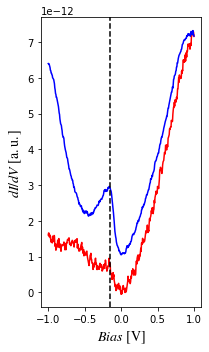

In [164]:
fig, axis = plt.subplots(figsize = (3, 5))

axis.plot(bias, f2_asdepo_spec, '-', color = 'r')
# axis.plot(bias, f1_480c30m_spec + 1e-12, '-', color = 'b')
axis.plot(bias, f2_500c30m450c30m_spec + 1e-12, '-', color = 'b')
# axis.plot(bias, f1_500c30m_spec + 3e-12, '-')
# axis.plot(bias, f1_550c30m_spec + 5e-12, '-')
# axis.plot(bias, f1_550c30m_7T_spec + 6e-12, '-')

# axis.axvline(x = -0.3, ls = '--', color = 'black')
axis.axvline(x = -0.15, ls = '--', color = 'black')

axis.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)

fig.tight_layout();

# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210412/doping_lv_2ML.png', dpi = 600)

In [152]:
gap_480c30m_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-03/Grid Spectroscopy002.3ds'
gap_500c30m450c30m_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/Grid Spectroscopy010.3ds'
gap_500c30m_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-12/Grid Spectroscopy007.3ds'
gap_550c30m_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Grid Spectroscopy003.3ds'
gap_550c30m_7T_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Grid Spectroscopy017.3ds'

In [139]:
bias_0 = np.linspace(50, -50, 401)
bias_1 = np.linspace(50, -36, 401)

In [153]:
gap_480c30m = nano.read_file(gap_480c30m_path)
gap_500c30m450c30m = nano.read_file(gap_500c30m450c30m_path)
gap_500c30m = nano.read_file(gap_500c30m_path)
gap_550c30m = nano.read_file(gap_550c30m_path)
gap_550c30m_7T = nano.read_file(gap_550c30m_7T_path)

In [121]:
gap_480c30m_spec = np.zeros(401)
for i in range(len(gap_480c30m.data)):
    gap_480c30m_spec += ((gap_480c30m.data[i][1] + gap_480c30m.data[i][4]) / 2)
gap_480c30m_spec = gap_480c30m_spec / len(gap_480c30m.data)

In [128]:
gap_500c30m450c30m_spec =np.zeros(401)
for i in range(len(gap_500c30m450c30m.data)):
    gap_500c30m450c30m_spec += ((gap_500c30m450c30m.data[i][1] + gap_500c30m450c30m.data[i][4]) / 2)
gap_500c30m450c30m_spec = gap_500c30m450c30m_spec / len(gap_500c30m450c30m.data)

In [133]:
gap_500c30m_spec = np.zeros(401)
for i in range(len(gap_500c30m.data)):
    gap_500c30m_spec += ((gap_500c30m.data[i][1] + gap_500c30m.data[i][4]) / 2)
gap_500c30m_spec = gap_500c30m_spec / len(gap_500c30m.data)

In [148]:
gap_550c30m_spec = np.zeros(401)
for i in range(len(gap_550c30m.data)):
    gap_550c30m_spec += ((gap_550c30m.data[i][1] + gap_550c30m.data[i][4]) / 2)
gap_550c30m_spec = gap_550c30m_spec / len(gap_550c30m.data)

In [154]:
gap_550c30m_7T_spec = np.zeros(401)
for i in range(len(gap_550c30m_7T.data)):
    gap_550c30m_7T_spec += ((gap_550c30m_7T.data[i][1] + gap_550c30m_7T.data[i][4]) / 2)
gap_550c30m_7T_spec = gap_550c30m_7T_spec / len(gap_550c30m_7T.data)

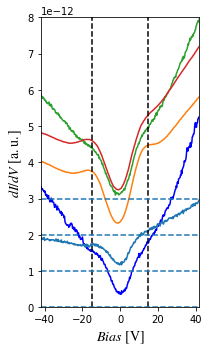

In [173]:
fig, axis = plt.subplots(figsize = (3, 5))

# axis.plot(bias, gap_asdepo_spec, '-', color = 'r')
# axis.plot(bias, f1_480c30m_spec + 1e-12, '-', color = 'b')
axis.plot(bias_0 - 8, gap_480c30m_spec + 0e-12, '-', color = 'b')
axis.plot(bias_0 - 8, gap_500c30m450c30m_spec + 1e-12, '-')
axis.plot(bias_1 - 8, gap_500c30m_spec + 2e-12, '-')
axis.plot(bias_0 - 8, gap_550c30m_spec + 3e-12, '-')
axis.plot(bias_1 - 8, gap_550c30m_7T_spec + 3e-12, '-')

axis.set_xlim(-42, 42)
axis.set_ylim(0, 8e-12)

axis.axvline(x = 15, ls = '--', color = 'black')
axis.axvline(x = -15, ls = '--', color = 'black')
for i in range(4):
    axis.axhline(y = i * 10 ** (-12), ls = '--')

axis.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)

fig.tight_layout();

# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210412/gap.png', dpi = 600)

In [9]:
Se_pos_full = np.genfromtxt('/Users/hunfen/OneDrive/General Files/ゼミー/20210412/Se_vacancy_pos_nm.txt')
Se_pos_in = np.genfromtxt('/Users/hunfen/OneDrive/General Files/ゼミー/20210422/Se_in.txt')

In [22]:
Se_in_idx = []
for i in range(len(Se_pos_in)):
    Se_in_idx.append(map_pos(Se_pos_in[i]))

In [23]:
Se_out_idx = []
for i in range(len(Se_pos_full)):
    if i in same_idx:
        continue
    else:
        Se_out_idx.append(map_pos(Se_pos_full[i]))

In [76]:
Se_all_idx = []
for i in range(len(Se_pos_full)):
    Se_all_idx.append(map_pos(Se_pos_full[i]))

In [19]:
Se_pos_out = np.zeros((len(Se_pos_full) - len(Se_pos_in), 2))

In [17]:
same_idx = []
for i in range(len(Se_pos_in)):
    for j in range(len(Se_pos_full)):
        if (Se_pos_in[i][0] == Se_pos_full[j][0]) and (Se_pos_in[i][1] == Se_pos_full[j][1]):
            same_idx.append(j)
        else:
            continue

In [20]:
f = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Grid Spectroscopy017.3ds')

In [78]:
Se_in_total = np.zeros(f.header['Points'])
Se_out_total = np.zeros(f.header['Points'])
Se_all_total = np.zeros(f.header['Points'])
for i in range(len(Se_in_idx)):
    Se_in_total += (f.data[Se_in_idx[i]][1] + f.data[Se_in_idx[i]][4]) / 2
Se_in_total = Se_in_total / len(Se_in_idx)

for j in range(len(Se_out_idx)):
    Se_out_total += (f.data[Se_out_idx[j]][1] + f.data[Se_out_idx[j]][4]) / 2
Se_out_total = Se_out_total / len(Se_out_idx)

for k in range(len(Se_all_idx)):
    Se_all_total += (f.data[Se_all_idx[k]][1] + f.data[Se_all_idx[k]][4]) / 2
Se_all_total = Se_all_total / len(Se_all_idx)

In [29]:
bias = np.linspace(50, -34, 401)

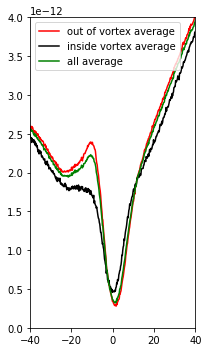

In [84]:
fig, axis = plt.subplots(figsize = (3, 5))

axis.plot(bias - 8, Se_out_total, '-', c = 'r', label = 'out of vortex average')
axis.plot(bias - 8, Se_in_total, '-', c = 'black', label = 'inside vortex average')
axis.plot(bias - 8, Se_all_total, '-', c = 'g', label = 'all average')

axis.legend()
axis.set_xlim(-40, 40)
axis.set_ylim(0, 4e-12)

# axis.axhline(y = 1e-12, xmin = 0.48, xmax = 0.52, ls = '-', c = 'black', lw = 1)
# axis.axvline(x = -11)
fig.tight_layout();
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210422/in_out_ave.png', dpi = 600)

In [72]:
In = 0
Out = 0
for i in range(200):
    In += Se_in_total[i]
    Out += Se_out_total[i]

In [73]:
In 

4.830454430654791e-10

In [74]:
Out

5.019679322493838e-10

In [ ]:
0